# Récupérer des données mesurées par un arduino avec Python


Importation des "libraries" utiles :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import serial #non installé par défaut dans Anaconda, s'installe avec la commande "conda install pyserial" ou "pip install pyserial"

Choix des paramètres :

In [2]:
ser = serial.Serial('COM3', 9600, timeout=None) #on définit le port sur lequel l'arduino est branché

nb_mesures = 1000 #nombre de points de mesures que l'on veut mesurer
nb_donnees=2 #nombre de valeurs que l'arduino renvoie sur chaque ligne (pour cet exemple : le temps et la température)

time.sleep(1) #pause de 1s pour laisser le temps à l'arduino de démarrer

Récupération des données envoyées par l'arduino sur le port série :

In [5]:
data=np.zeros((nb_mesures,nb_donnees))

ser.reset_input_buffer() #élimine tout ce qui peut avoir été envoyé sur le port série avant de commencer les mesures
try:
    print(ser.readline()) #on lit juste la première ligne de données envoyées par l'arduino (pour vérifier qu'on reçoit bien des données)
except:
    print('Problème de réception des données')
    
#La mesure peut être intérrompue en appuyant sur "echap" s'il y a un problème
for i_mes in range(nb_mesures) :
    data_byte=ser.readline()
    data_string=data_byte.decode('ascii')
    data[i_mes,0:(nb_donnees+1)]=np.fromstring(data_string, dtype=float, sep="\t")
    if i_mes % 100 == 0 :
        print("Mesure {} / {} ".format(i_mes,nb_mesures)) #permet d'afficher une "barre de progression" de la mesure


b'8\t25\t0\t25.20\r\n'
Mesure 0 / 1000 
Mesure 100 / 1000 
Mesure 200 / 1000 
Mesure 300 / 1000 
Mesure 400 / 1000 
Mesure 500 / 1000 
Mesure 600 / 1000 
Mesure 700 / 1000 
Mesure 800 / 1000 
Mesure 900 / 1000 


On trace les données obtenues :

Text(0, 0.5, 'Température (°C)')

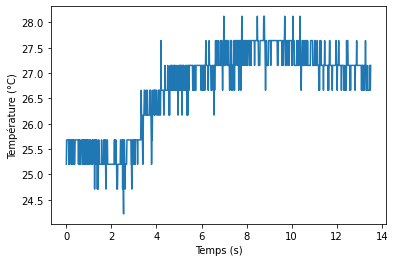

In [6]:
temps = (data[:,0]-data[0,0])/1000 # on fixe t = 0 à la première mesure, et on convertit les ms en s
temperature = data[:,1]

plt.figure()
plt.plot(temps,temperature)
plt.xlabel('Temps (s)')
plt.ylabel('Température (°C)')
plt.title('Évolution de la température')

À la fin, on coupe la connexion avec l'arduino :

In [7]:
ser.close()